In [1]:
import autograd
from functools import reduce
import numpy as np
import matplotlib.pyplot as plt

import torch

In [47]:
_data = np.pi * (np.random.rand(10000, 1) * 2 - 1)
_label = np.exp(_data) + 2 

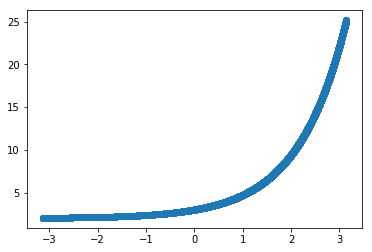

In [48]:
plt.scatter(_data, _label)

In [49]:
m = torch.nn.Linear(1, 32)
print(list(m.parameters())[1])

Parameter containing:
tensor([-0.3195, -0.6635,  0.2670, -0.0050,  0.5204,  0.0234,  0.9958, -0.1233,
         0.1591, -0.5911,  0.0138, -0.4769,  0.2405,  0.1033,  0.5314,  0.5992,
         0.2670, -0.1887, -0.6450, -0.4123,  0.3538,  0.0552, -0.4284, -0.5363,
        -0.3609, -0.2949, -0.8202,  0.9758,  0.5464, -0.0231, -0.4846, -0.2899],
       requires_grad=True)


0 63.88227462768555
100 1.5892460346221924
200 0.41386479139328003
300 0.17169278860092163
400 0.24080947041511536


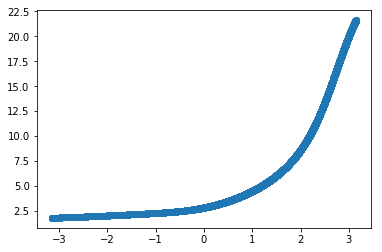

In [51]:
mm = torch.nn.Sequential(torch.nn.Linear(1, 32), 
                         torch.nn.Tanh(), 
                         torch.nn.Linear(32, 32),
                         torch.nn.Tanh(),
                         torch.nn.Linear(32, 1))

def train(mm):
    
    data = torch.tensor(_data, dtype=torch.float32)
    label = torch.tensor(_label, dtype=torch.float32)
    
    for i in range(500):
        
        out = mm(data)
        loss = ((out-label)**2).mean()
        
        mm.zero_grad()
        loss.backward()
        for p in mm.parameters():
            p.data.sub_(0.01 * p.grad.data)

        if i % 100 == 0:
            print(i, loss.item())

train(mm)


plt.scatter(_data, mm(torch.tensor(_data, dtype=torch.float32)).data.numpy())

In [43]:
class Model(autograd.Module):
    def __init__(self, ):
        super().__init__()
        self.l1 = autograd.Linear(1, 32)
        self.l2 = autograd.Linear(32, 32)
        self.l3 = autograd.Linear(32, 1)
    
        self.w1 = autograd.Parameter(1, 32)
        self.b1 = autograd.Parameter(32)
        self.w2 = autograd.Parameter(32, 32)
        self.b2 = autograd.Parameter(32)
        self.w3 = autograd.Parameter(32, 1)
        self.b3 = autograd.Parameter(1)
        
    def forward(self, data):
        out = autograd.tanh(self.l1(data))
        out = autograd.tanh(self.l2(out))
        out = self.l3(out)
        # out = autograd.relu(data @ self.w1 + self.b1)
        # out = autograd.relu(out @ self.w2 + self.b2)
        # out = out @ self.w3 + self.b3
        
        return out

In [45]:
model = Model()
for n, p in model.named_parameters():
    print(n, p.shape, id(p), p.sum())
    break

Model.b1 (32,) 140695979551712 Tensor(0.052446180969855094, requires_grad=True)


0 82.01823535536238
100 0.5554633434499187
200 1.4185393662529746
300 0.487737742263538
400 0.35035267974998474


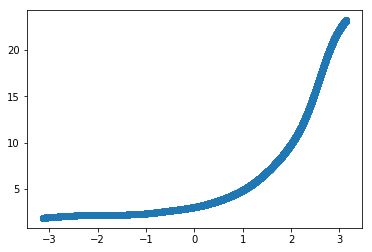

In [54]:
model = Model()

def train(model):
    
    data = autograd.Tensor(_data)
    label = autograd.Tensor(_label)

    lr = 0.01
    
    for i in range(500):
        
        model.zero_grad()
        
        out = model(data)
        loss = ((out - label) ** 2).mean()
        loss.backward()
        
        for p in model.parameters():
            p.sub_(p.grad * lr)
            
        if i % 100 == 0:
            print(i, loss.data)

train(model)

plt.scatter(_data, model(autograd.Tensor(_data)).data)

In [9]:
import torch
print(torch.__version__)

1.5.0+cpu


In [16]:
a = np.random.rand(3, 10)
b = np.random.rand(10, 4)
c = np.random.rand(4)

In [18]:
x = torch.tensor(a, requires_grad=True)
m = torch.tensor(b, requires_grad=True)
k = torch.tensor(c, requires_grad=True)
y = x @ m + k
y = y.mean()
y.backward()

print(x.grad)
print(m.grad)
print(k.grad)

tensor([[0.2120, 0.1006, 0.2438, 0.0930, 0.2412, 0.1319, 0.1833, 0.1887, 0.2144,
         0.1574],
        [0.2120, 0.1006, 0.2438, 0.0930, 0.2412, 0.1319, 0.1833, 0.1887, 0.2144,
         0.1574],
        [0.2120, 0.1006, 0.2438, 0.0930, 0.2412, 0.1319, 0.1833, 0.1887, 0.2144,
         0.1574]], dtype=torch.float64)
tensor([[0.1149, 0.1149, 0.1149, 0.1149],
        [0.1313, 0.1313, 0.1313, 0.1313],
        [0.1865, 0.1865, 0.1865, 0.1865],
        [0.1239, 0.1239, 0.1239, 0.1239],
        [0.1452, 0.1452, 0.1452, 0.1452],
        [0.0889, 0.0889, 0.0889, 0.0889],
        [0.0995, 0.0995, 0.0995, 0.0995],
        [0.2377, 0.2377, 0.2377, 0.2377],
        [0.1046, 0.1046, 0.1046, 0.1046],
        [0.1467, 0.1467, 0.1467, 0.1467]], dtype=torch.float64)
tensor([0.2500, 0.2500, 0.2500, 0.2500], dtype=torch.float64)


In [19]:
x = autograd.Tensor(a, requires_grad=True)
m = autograd.Tensor(b, requires_grad=True)
k = autograd.Tensor(c, requires_grad=True)
y = x @ m + k
y = y.mean()
y.backward()

print(x.grad)
print(m.grad)
print(k.grad)

Tensor([[0.21200565 0.10064502 0.24384576 0.09304668 0.24124357 0.13193396
  0.1833288  0.18867418 0.21441004 0.15744546]
 [0.21200565 0.10064502 0.24384576 0.09304668 0.24124357 0.13193396
  0.1833288  0.18867418 0.21441004 0.15744546]
 [0.21200565 0.10064502 0.24384576 0.09304668 0.24124357 0.13193396
  0.1833288  0.18867418 0.21441004 0.15744546]], requires_grad=False)
Tensor([[0.11487319 0.11487319 0.11487319 0.11487319]
 [0.13132735 0.13132735 0.13132735 0.13132735]
 [0.18647966 0.18647966 0.18647966 0.18647966]
 [0.12394914 0.12394914 0.12394914 0.12394914]
 [0.14519449 0.14519449 0.14519449 0.14519449]
 [0.08886295 0.08886295 0.08886295 0.08886295]
 [0.09947583 0.09947583 0.09947583 0.09947583]
 [0.23766717 0.23766717 0.23766717 0.23766717]
 [0.10458872 0.10458872 0.10458872 0.10458872]
 [0.14666803 0.14666803 0.14666803 0.14666803]], requires_grad=False)
Tensor([0.25 0.25 0.25 0.25], requires_grad=False)


In [13]:
x = torch.tensor(a, requires_grad=True)

y = torch.tanh(x)
y.mean().backward()

print(x.grad)

tensor([[0.0293, 0.0284, 0.0295, 0.0292, 0.0182, 0.0145, 0.0180, 0.0316, 0.0217,
         0.0227],
        [0.0155, 0.0321, 0.0180, 0.0223, 0.0273, 0.0215, 0.0247, 0.0147, 0.0228,
         0.0146],
        [0.0188, 0.0250, 0.0252, 0.0194, 0.0182, 0.0277, 0.0227, 0.0323, 0.0332,
         0.0309]], dtype=torch.float64)


In [14]:
x = autograd.Tensor(a, requires_grad=True)

y = autograd.tanh(x)
y.mean().backward()

print(x.grad)

Tensor([[0.02932208 0.02837617 0.02954617 0.02915454 0.01818414 0.01449179
  0.01803519 0.03163825 0.02167592 0.02269661]
 [0.01551822 0.03210233 0.01795252 0.02228669 0.0273407  0.02149842
  0.02474053 0.01469801 0.02284488 0.01463336]
 [0.01881288 0.02495799 0.02519299 0.01938398 0.01822057 0.02769743
  0.0227085  0.03229486 0.03319141 0.03086085]], requires_grad=False)


In [8]:
np.array(1).shape

()

In [9]:
np.array([1]).shape

(1,)

In [11]:
a = np.random.rand(5, 5)
a[...] = 0
a += 1

In [35]:
np.exp(-a)

array([[0.36787944, 0.36787944, 0.36787944, 0.36787944, 0.36787944],
       [0.36787944, 0.36787944, 0.36787944, 0.36787944, 0.36787944],
       [0.36787944, 0.36787944, 0.36787944, 0.36787944, 0.36787944],
       [0.36787944, 0.36787944, 0.36787944, 0.36787944, 0.36787944],
       [0.36787944, 0.36787944, 0.36787944, 0.36787944, 0.36787944]])